In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Prajna/Desktop/App_Synergy/data_copy.csv')

In [3]:
df.head()

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics,Gender,Age
0,Freelance entrepreneur. Hardcore bacon guru. S...,0,8,1,5,4,9,9,0,16
1,Evil zombie fanatic. Award-winning social medi...,6,5,4,5,2,1,2,1,28
2,Friendly twitter trailblazer. Pop cultureaholi...,6,5,5,1,5,5,8,1,33
3,Hardcore twitter evangelist. Evil coffee junki...,4,7,6,2,7,5,1,1,20
4,Freelance music practitioner. Typical travel e...,4,0,3,4,9,6,7,0,28


In [4]:
df_new = df.iloc[:,1:10]

In [5]:
df_new.head()

,Movies,TV,Religion,Music,Sports,Books,Politics,Gender,Age
0,0,8,1,5,4,9,9,0,16
1,6,5,4,5,2,1,2,1,28
2,6,5,5,1,5,5,8,1,33
3,4,7,6,2,7,5,1,1,20
4,4,0,3,4,9,6,7,0,28


In [6]:
# Standardization
from sklearn.preprocessing import StandardScaler

a = StandardScaler()
a.fit(df_new)
df_standardized = a.transform(df_new)
df_std = pd.DataFrame(df_standardized)
df_std.describe()

,0,1,2,3,4,5,6,7,8
count,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01
mean,1.184238e-16,-7.401487e-18,5.921189e-17,-2.220446e-17,8.881784e-17,1.480297e-17,1.110223e-17,4.440892e-17,1.480297e-17
std,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00
min,-1.841474e+00,-1.318761e+00,-1.204090e+00,-1.533240e+00,-1.274919e+00,-1.355669e+00,-1.290994e+00,-1.224745e+00,-1.704936e+00
25%,-1.040833e+00,-9.890707e-01,-8.499459e-01,-7.118614e-01,-9.207747e-01,-9.071019e-01,-8.068715e-01,-1.224745e+00,-9.427959e-01
50%,1.601282e-01,3.296902e-01,-1.416576e-01,-3.011721e-01,-2.124865e-01,1.395541e-01,-6.454972e-01,8.164966e-01,3.274381e-01
75%,5.604485e-01,9.890707e-01,7.437027e-01,5.202064e-01,6.728738e-01,8.871656e-01,9.682458e-01,8.164966e-01,1.004896e+00
max,1.761410e+00,1.318761e+00,1.983207e+00,2.162963e+00,1.558234e+00,1.335732e+00,1.613743e+00,8.164966e-01,1.343625e+00


In [7]:
df_std.head()

,0,1,2,3,4,5,6,7,8
0,-1.841474,1.318761,-0.849946,0.520206,-0.212486,1.335732,1.613743,-1.224745,-1.704936
1,0.560449,0.329690,0.212486,0.520206,-0.920775,-1.056624,-0.645497,0.816497,0.327438
2,0.560449,0.329690,0.566631,-1.122551,0.141658,0.139554,1.290994,0.816497,1.174261
3,-0.240192,0.989071,0.920775,-0.711861,0.849946,0.139554,-0.968246,0.816497,-1.027478
4,-0.240192,-1.318761,-0.141658,0.109517,1.558234,0.438599,0.968246,-1.224745,0.327438


In [8]:
df_std.shape

(15, 9)

In [9]:
df_bios = df.iloc[:,0:1]
df_bios.head()

,Bios
0,Freelance entrepreneur. Hardcore bacon guru. S...
1,Evil zombie fanatic. Award-winning social medi...
2,Friendly twitter trailblazer. Pop cultureaholi...
3,Hardcore twitter evangelist. Evil coffee junki...
4,Freelance music practitioner. Typical travel e...


In [10]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,len(df_bios)):
  review = re.sub('[^a-zA-Z]', ' ', df_bios['Bios'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()  
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prajna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
corpus[4]

'freelanc music practition typic travel enthusiast troublemak social media trailblaz'

In [12]:
# Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
df_bios_new = cv.fit_transform(corpus).toarray()

In [13]:
df_bios_new.shape

(15, 79)

In [14]:
# Creating a new DF that contains the vectorized words
df_wrds = pd.DataFrame(df_bios_new, columns=cv.get_feature_names())
df_wrds

,advoc,aficionado,alcohol,analyst,anim,avid,award,bacon,beer,box,...,twitter,type,typic,unabl,unapologet,wannab,web,win,writer,zombi
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,1,1,1
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,1,...,0,1,1,1,1,0,0,0,0,0
9,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [15]:
X = pd.concat([df_std, df_wrds], axis=1)
X

,0,1,2,3,4,5,6,7,8,advoc,...,twitter,type,typic,unabl,unapologet,wannab,web,win,writer,zombi
0,-1.841474,1.318761,-0.849946,0.520206,-0.212486,1.335732,1.613743,-1.224745,-1.704936,1,...,0,0,0,0,0,0,0,0,0,1
1,0.560449,0.329690,0.212486,0.520206,-0.920775,-1.056624,-0.645497,0.816497,0.327438,0,...,0,0,0,0,0,0,1,1,1,1
2,0.560449,0.329690,0.566631,-1.122551,0.141658,0.139554,1.290994,0.816497,1.174261,0,...,1,0,0,0,0,0,0,0,0,0
3,-0.240192,0.989071,0.920775,-0.711861,0.849946,0.139554,-0.968246,0.816497,-1.027478,0,...,1,0,0,0,0,0,0,0,0,0
4,-0.240192,-1.318761,-0.141658,0.109517,1.558234,0.438599,0.968246,-1.224745,0.327438,0,...,0,0,1,0,0,0,0,0,0,0
5,0.560449,-1.318761,-1.204090,-1.533240,0.495802,-0.458535,-0.968246,0.816497,0.327438,0,...,0,0,0,0,0,0,0,0,0,0
6,-1.040833,-0.659380,1.983207,2.162963,0.141658,-1.355669,-0.645497,-1.224745,1.174261,1,...,0,0,0,0,0,0,0,0,0,1
7,0.160128,-1.318761,1.274919,-0.711861,-0.920775,-0.159490,0.968246,-1.224745,-1.196843,0,...,0,0,0,0,0,0,0,0,0,0
8,1.361089,0.989071,0.212486,0.109517,-1.274919,-1.355669,-0.645497,0.816497,1.174261,0,...,0,1,1,1,1,0,0,0,0,0
9,-1.040833,-1.318761,-0.849946,-0.301172,-1.274919,1.335732,-1.290994,0.816497,-0.688749,0,...,0,0,0,0,0,0,0,0,1,1


# Implementing K-Means++
# Using the elbow method to find the optimal number of clusters

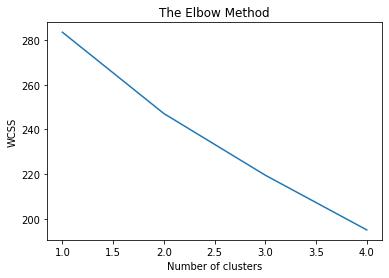

In [18]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 5), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(X)
pred = kmeans.predict(X)

#y_kmeans = kmeans.fit_predict(X)

In [20]:
frame = pd.DataFrame(X)
frame['cluster'] = pred
frame['cluster'].value_counts()

4    4
3    4
1    4
2    2
0    1
Name: cluster, dtype: int64

In [21]:
pred

array([2, 3, 1, 3, 1, 4, 4, 1, 3, 4, 3, 1, 4, 2, 0], dtype=int32)

In [22]:
df['NEW_COLUMN'] = pd.Series(pred, index=df.index)

In [23]:
df.head(30)

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics,Gender,Age,NEW_COLUMN
0,Freelance entrepreneur. Hardcore bacon guru. S...,0,8,1,5,4,9,9,0,16,2
1,Evil zombie fanatic. Award-winning social medi...,6,5,4,5,2,1,2,1,28,3
2,Friendly twitter trailblazer. Pop cultureaholi...,6,5,5,1,5,5,8,1,33,1
3,Hardcore twitter evangelist. Evil coffee junki...,4,7,6,2,7,5,1,1,20,3
4,Freelance music practitioner. Typical travel e...,4,0,3,4,9,6,7,0,28,1
5,Internet fan. Avid tv maven. Communicator. Cer...,6,0,0,0,6,3,1,1,28,4
6,Professional pop culture advocate. Zombie guru...,2,2,9,9,5,0,2,0,33,4
7,Music evangelist. Certified problem solver. Re...,5,0,7,2,2,4,7,0,19,1
8,Unapologetic music evangelist. Typical creator...,8,7,4,4,1,0,2,1,33,3
9,Professional pop culture fanatic. Hardcore cof...,2,0,1,3,1,9,0,1,22,4
